# Equações não-lineares de uma variável

## Método do ponto fixo

O método da bisseção, tem seus prós e contras. Funciona para qualquer equação, desde que tenhamos os pontos cercando a raiz. Existe um método alternativo bastante simples, chamado método do ponto fixo, ou método de relaxação, que pode funcionar bem em alguns casos. Sempre que temos uma equação da forma $f(x) = 0$, pode-se rescrevê-la como

$$
x = g(x).
$$

Vamos ver o caso da equação

$$
x = 2 - \mathrm{e}^{-x}.
$$

Primeiro, definimos a função $g(x)$ em Python.

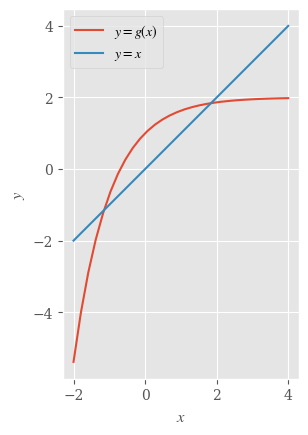

In [1]:
import numpy as np

def g(x):
    return 2.0 - np.exp(-x)

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'stix'

fig, ax = plt.subplots()
x = np.linspace(-2, 4, 30)

ax.plot(x, g(x), label=r'$y = g(x)$')
ax.plot(x, x, label=r'$y = x$')

ax.set_ylabel(r'$y$')
ax.set_xlabel(r'$x$')
ax.legend()
ax.set_aspect('equal')
plt.show()

Não existe solução analítica conhecida para esta equação. Podemos tentar encontrar a solução iterando valores na equação. Chutamos um valor inicial para a variável $x^{(0)}$, colocamos no lado direito da igualdade, e obtemos um novo valor $x^{(1)}$ do lado esquerdo. Por exemplo, tomando o valor inicial $x^{(0)} = 1$,

In [2]:
x0 = 1.0
x1 = g(x0)
print(f'x1 ~= {x1:.4f}')

x1 ~= 1.6321


Repetimos então o processo, e se tivermos sorte, o valor de $x^{(n)}$ vai convergir para um chamado ponto fixo da equação. Isto é o que acontece neste exemplo. Iterando $N = 10$ vezes,

In [3]:
N = 10
x = 1.0
for i in range(N):
    x = g(x)
    print(f'x_{i + 1} ~= {x:.8f}')

x_1 ~= 1.63212056
x_2 ~= 1.80448547
x_3 ~= 1.83544089
x_4 ~= 1.84045686
x_5 ~= 1.84125511
x_6 ~= 1.84138178
x_7 ~= 1.84140187
x_8 ~= 1.84140506
x_9 ~= 1.84140557
x_10 ~= 1.84140565


Quando o valor de $x$ converge para um ponto fixo, os dois lados da equação $x = g(x)$ são iguais. Esta condição é a própria definição de solução de uma equação. Graficamente, a convergência ocorre conforme a figura abaixo:

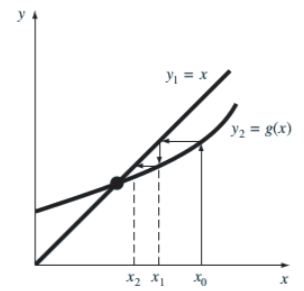

Veja que o programa é muito simples, quase trivial, e quando converge, faz isso bem rapidamente. Mas, este método tem algumas desvantagens. Primeiro, nem sempre é fácil rescrever equação de uma forma forma $x = g(x)$ que faça o método funcionar. Na verdade, existem múltiplas equações desta forma que expressam a mesma equação original (isto é, têm a mesma solução). Entretanto, algumas formas convergem quando usamos o método do ponto fixo, e outras não.

### Exemplo

Considere a equação

$$
\ln x + x^2 - 1 = 0.
$$

Uma forma de deixá-la adequada para o método do ponto fixo é tomar a exponencial dos dois lados da igualdade,

\begin{align}
\mathrm{e}^{\ln x + x^2 - 1} &= \mathrm{e}^0 \\
\mathrm{e}^{\ln x}\ \mathrm{e}^{x^2 - 1} &= 1 \\
x\ \mathrm{e}^{x^2 - 1} &= 1 \\
x\ &= \mathrm{e}^{1 - x^2}
\end{align}

Nenhuma das duas formas têm solução analítica conhecida, mas um $x$ que satisfaz a primeira equação, satisfaz também a segunda. Neste caso particular, é fácil descobrir por intuição que a solução é $x^* = 1$. Se tentarmos encontrar esta solução com o método do ponto fixo, com valor inicial $x^{(0)} = 0.5$, obtemos

x_1 ~= 2.11700002
x_2 ~= 0.03075542
x_3 ~= 2.71571183
x_4 ~= 0.00170347
x_5 ~= 2.71827394
x_6 ~= 0.00167991
x_7 ~= 2.71827416
x_8 ~= 0.00167991
x_9 ~= 2.71827416
x_10 ~= 0.00167991


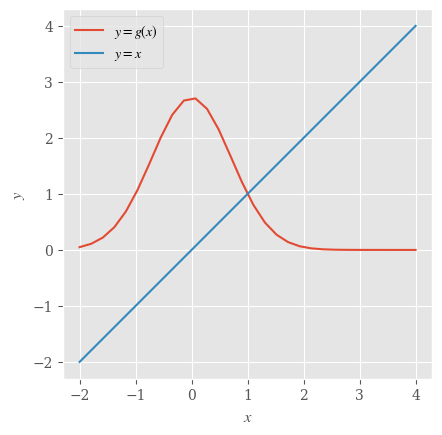

In [4]:
def g(x):
    return np.exp(1.0 - x**2)

x = 0.5
for i in range(10):
    x = g(x)
    print(f'x_{i + 1} ~= {x:.8f}')
    
fig, ax = plt.subplots()
x = np.linspace(-2, 4, 30)

ax.plot(x, g(x), label=r'$y = g(x)$')
ax.plot(x, x, label=r'$y = x$')

ax.set_ylabel(r'$y$')
ax.set_xlabel(r'$x$')
ax.legend()
ax.set_aspect('equal')
plt.show()

Em vez de convergir para um local, o valor de $x$ oscila entre dois valores, não importa quantas iterações façamos. Neste caso o método do ponto fixo falha.

Podemos tentar expressar a equação original de outra forma.

\begin{align}
\ln x + x^2 - 1 &= 0 \\
x^2 &= 1 - \ln x \\
x &= \sqrt{1 - \ln x}.
\end{align}

Aplicando o método do ponto fixo,

/var/folders/_4/4_jgl64j4s9bfwjs2dlqlrbh0000gn/T/ipykernel_41655/3644116838.py:4: RuntimeWarning: invalid value encountered in log
  return np.sqrt(1.0 - np.log(x))
/var/folders/_4/4_jgl64j4s9bfwjs2dlqlrbh0000gn/T/ipykernel_41655/3644116838.py:4: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(1.0 - np.log(x))


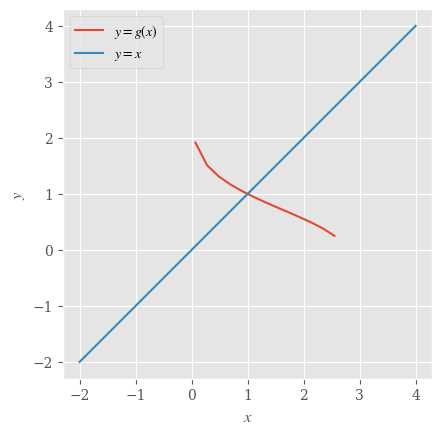

x_1 ~= 1.30120989
x_2 ~= 0.85831549
x_3 ~= 1.07367758
x_4 ~= 0.96379990
x_5 ~= 1.01826891
x_6 ~= 0.99090664
x_7 ~= 1.00455710
x_8 ~= 0.99772404
x_9 ~= 1.00113863
x_10 ~= 0.99943085


In [5]:
def g(x):
    # Note que np.log() é o logaritmo natural, de base e.
    # Para logaritmo de base 10, use np.log10().
    return np.sqrt(1.0 - np.log(x))

fig, ax = plt.subplots()
x = np.linspace(-2, 4, 30)

ax.plot(x, g(x), label=r'$y = g(x)$')
ax.plot(x, x, label=r'$y = x$')

ax.set_ylabel(r'$y$')
ax.set_xlabel(r'$x$')
ax.legend()
ax.set_aspect('equal')
plt.show()

x = 0.5
for i in range(10):
    x = g(x)
    print(f'x_{i + 1} ~= {x:.8f}')

O método agora converge (porém oscilando) para a solução $x^* = 1$.

### Critério de convergência

O método do ponto fixo está intimamente relacionado a mapas iterativos, talvez este video sobre [mapas quadráticos](https://www.youtube.com/watch?v=eC9-1wY7FvU&t=573s) ajude a ter um entendimento mais intuitivo.

Por outro lado, podemos tentar entender matematicamente por que o método do ponto fixo funciona para o segundo caso e não para o primeiro. Há uma discussão formal sobre esser assunto na [seção 3.3 do livro Cálculo Numérico](https://www.ufrgs.br/reamat/CalculoNumerico/livro-py/sdeduv-iteracao_de_ponto_fixo.html) do REAMAT/UFRGS.

Vamos admitir que a equação $x = g(x)$ tem uma solução em $x = x^*$. Próximo deste valor, podemos usar uma *expansão de Taylor* (veja o material extra no Moodle) de $g(x)$ ao redor de $x^*$ para estimar onde o próximo ponto de uma iteração vai parar. Isto é,

$$
x^{(n+1)} = g(x^{(n)}) = g(x^*) + (x^{(n)} - x^*)\ g^\prime(x^*) + \ldots,
$$

onde $g^\prime(x^*)$ é a derivada de $g(x)$ no ponto $x = x^*$. Mas, por definição, $x^*$ é uma solução da equação original, logo $x^* = g(x^*)$. Assim,

\begin{align}
x^{(n+1)} - g(x^*) &= (x^{(n)} - x^*)\ g^\prime(x^*) + \ldots \\
x^{(n+1)} - x^* &= (x^{(n)} - x^*)\ g^\prime(x^*) + \ldots.
\end{align}

Desconsiderando termos de segunda ordem, e definindo $\epsilon^{(n)} = x^{(n)} - x^*$ como o erro da iteração atual em relação à solução verdadeira, vemos que

$$
\epsilon^{(n+1)} \approx \epsilon^{(n)} g^\prime(x^*).
$$

Isto é, a distância até a solução é multiplicada a cada passo por um fator $g^\prime(x^*)$, a derivada de $g(x)$ em $x = x^*$. Se o valor absoluto dessa derivada for maior que 1, então a distância vai aumentar a cada passo, e o método não vai convergir. Em outras palavras, a condição para que haja convergência no método do ponto fixo é

$$
|g^\prime(x^*)| < 1.
$$

Na nossa primeira tentativa do exemplo, quando não houve convergência,

\begin{align}
g(x) &= \mathrm{e}^{1 - x^2},\ x^* = 1 \\
|g^\prime(x^*)| &= \left| -2\mathrm{e}^{1-(x^*)^2}  \right| = 2 > 1,
\end{align}

logo, a não convergência é esperada.

Por outro lado, na segunda tentativa temos a convergência, pois

\begin{align}
g(x) &= \sqrt{1 - \ln x},\ x^* = 1 \\
|g^\prime(x^*)| &= \left| -\frac{1}{2 x^* \sqrt{1 - \ln x^*}}  \right| = \frac 1 2 < 1.
\end{align}

Na prática, não se sabe de antemão o valor de $x^*$, logo não podemos estimar o erro de forma precisa. Assim, precisamos calcular o erro com base nos valores calculados $x^{(n)}$. Podemos analisar a evolução da solução com base na diferença entre a posição atual e a anterior,

$$
\Delta^{(n+1)} = x^{(n + 1)} - x^{(n)}.
$$


Fazendo $\epsilon^{(n+1)} - \epsilon^{(n)}$, temos

\begin{align}
\epsilon^{(n+1)} - \epsilon^{(n)} &= x^{(n+1)} - x^* - x^{(n)} + x^* \\
\epsilon^{(n+1)} - \epsilon^{(n)} &= x^{(n+1)} - x^{(n)} \\
\Delta^{(n+1)} &= \epsilon^{(n+1)} - \epsilon^{(n)}.
\end{align}

Por outro lado,

$$
\epsilon^{(n+1)} = \epsilon^{(n)} g^\prime(x^*) \\
\epsilon^{(n)} = \frac{\epsilon^{(n+1)}}{g^\prime(x^*)},
$$

portanto

\begin{align}
\Delta^{(n+1)} &= \epsilon^{(n+1)} - \frac{\epsilon^{(n+1)}}{g^\prime(x^*)} \\
&= \epsilon^{(n+1)}\left(1 - \frac{1}{g^\prime(x^*)} \right)
\end{align}
$$
\implies \epsilon^{(n+1)} = \frac{1}{1 - \frac{1}{g^\prime(x^*)}} \Delta^{(n+1)}.
$$

Agora, próximo da convergência, $g^\prime(x^*) \approx g^\prime(x)$. Caso a derivada seja desconhecida, ou difícil de calcular, podemos estimar a derivada usando uma *diferença finita* (que veremos com mais detalhes adiante no curso). Também, sabemos que $x^{(n+1)} = g(x^{(n)})$. Logo,

\begin{align}
g^{\prime}(x) &\cong \frac{g(x^{(n)}) - g(x^{(n-1)})}{x^{(n)} - x^{(n-1)}} \\
&\cong \frac{x^{(n+1)} - x^{(n)}}{x^{(n)} - x^{(n-1)}} \\
&\cong \frac{\Delta^{(n+1)}}{\Delta^{(n)}}.
\end{align}

Finalmente, o erro estimado no passo $n + 1$ é

\begin{align}
\epsilon^{(n+1)} &= \frac{1}{1 - \frac{\Delta^{(n)}}{\Delta^{(n+1)}}} \Delta^{(n + 1)} \\
&= \frac{\left[\Delta^{(n + 1)}\right]^2}{\Delta^{(n+1)} - \Delta^{(n)}}.
\end{align}

Assim, podemos estimar o erro apenas guardando a diferença do passo anterior.

### Exercício

Na teoria de campo médio do ferromagnetismo, a intensidade $M$ da magnetização de um material ferromagnético como ferro depende da temperatura $T$ conforme a equação

$$
M = \mu \tanh \frac{JM}{k_\mathrm{B}T},
$$

onde $\mu$ é o momento magnético, $J$ é uma constante de acoplamento, e $k_\mathrm{B}$ é a constante de Boltzmann. Para simplificar, vamos definir $m = \frac{M}{\mu}$ e $C =  \frac{\mu J}{k_\mathrm{B}}$, ficando com a equação

$$
m = \tanh \frac{Cm}{T}. 
$$

É fácil ver que esta equação tem uma solução em $m=0$, que significa "sem magnetização". Mas e as outras soluções? Não há método conhecido para resolver esta equação analiticamente, vamos encontrá-la numericamente. Vamos tomar $C = 1$ por simplicidade e buscar soluções em função de $T$, com tolerância de $\epsilon = \pm 10^{-10}$ da resposta verdadeira. É possível encontrar a derivada da função $g(m)$ analiticamente, e utilizá-la para calcular o erro. A implementação disto fica como exercício.

**a.** Defina uma função que calcula $m$ usando o método do ponto fixo. Calcule $m$ para alguns valores de $T$. 

*Dica: use $N$ grande, pois alguns pontos podem demorar bastante para convergir.*

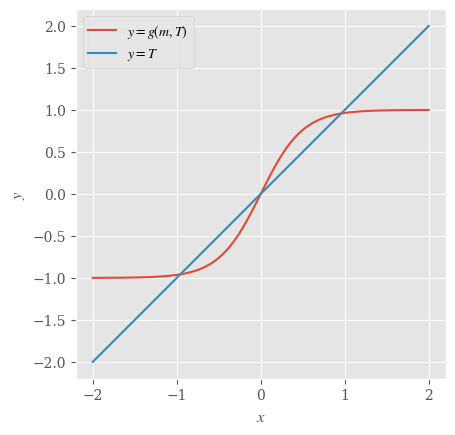

In [6]:
C = 1.0

def g(m, T):
    return np.tanh(C * m / T)

fig, ax = plt.subplots()
m = np.linspace(-2.0, 2.0, 200)

T = 0.5
ax.plot(m, g(m, T), label=r'$y = g(m, T)$')
ax.plot(m, m, label=r'$y = T$')

ax.set_ylabel(r'$y$')
ax.set_xlabel(r'$x$')
ax.legend()
ax.set_aspect('equal')
plt.show()

In [7]:
eps = 1e-10
m = 0.5
T = 0.5

for n in range(200):
    m = g(m, T)
print(m)

0.9575040240772688


In [8]:
def mag(T):
    m = 0.5

    for n in range(200):
        m = g(m, T)
    return m

mag(0.9)

0.5254295126580083

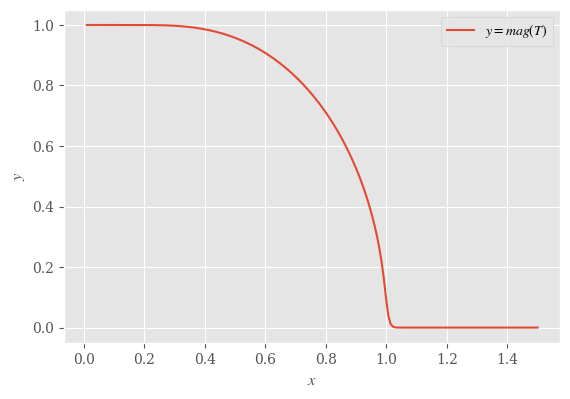

In [9]:
fig, ax = plt.subplots()
T = np.linspace(0.01, 1.5, 200)

ax.plot(T, mag(T), label=r'$y = mag(T)$')

ax.set_ylabel(r'$y$')
ax.set_xlabel(r'$x$')
ax.legend()
ax.set_aspect('equal')
plt.show()

**b.** Faça um gráfico da magnetização em função da temperatura, com $0{,}01 \lt T \lt 1{,}5$. Verifique que ocorre uma mudança de fase em $T = 1$.